# Pymaceuticals Inc.
---

### Analysis
- The majority of mice were treated with Capomulin and Ramicane, with both treatments demonstrating the greatest effectiveness in reducing tumor volumes in mice that had lower final average tumor volumes.
- A strong correlation was observed between weight and tumor volume in mice treated with Capomulin, where heavier mice tended to have larger tumors.
- Tumor volumes in mouse L509 decreased following treatment with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
study_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.- use. unique()
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Check data
duplicate_mouse_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
clean_study_data_complete.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryDict = pd.DataFrame(
    {
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "sTumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem
    
    }
)

# Assemble the resulting series into a single summary DataFrame.
summaryDict

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,sTumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median","std", "sem"]}   
)
df2

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# generate the series for all drug regimens - counts of timepoints (count of occurances of each drug regimen)
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

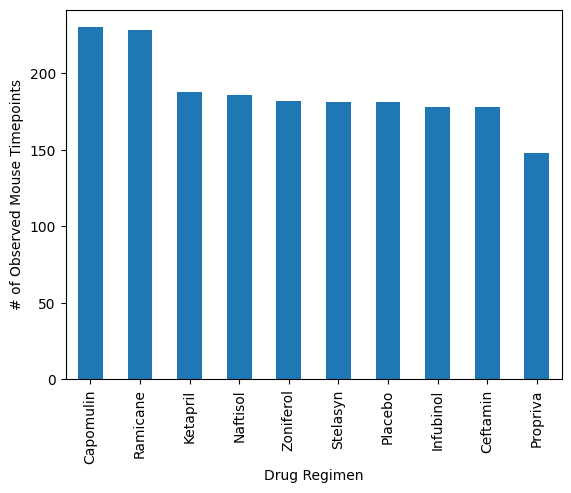

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


In [14]:
counts.index.values #show the names of the regim

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [15]:
counts.values # shows the values of the counts

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

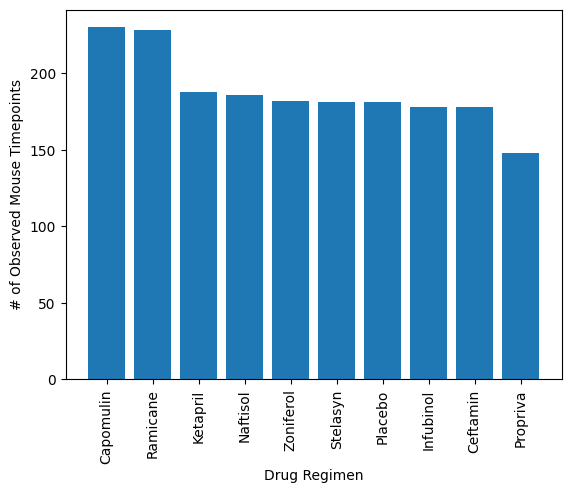

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()



In [17]:
# remove duplicates
mice_df = clean_study_data_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

In [18]:
# Get the unique mice with their gender
counts = mice_df["Sex"].value_counts()
counts

Sex
Male      125
Female    123
Name: count, dtype: int64

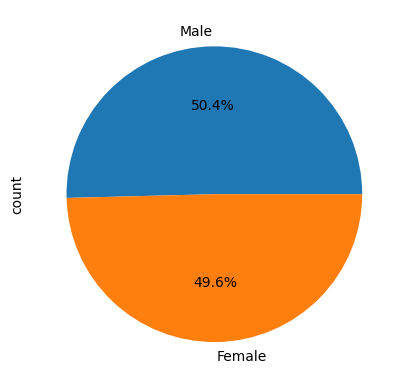

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
counts.plot(
    kind="pie",
   autopct="%1.1f%%",    
)
plt.title,
# Get the unique mice with their gender
counts = mice_df["Sex"].value_counts()
counts
# Make the pie chart
plt.show()


In [20]:
# remove duplicates
mice_df = clean_study_data_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

In [21]:
# Get the unique mice with their gender
counts = mice_df["Sex"].value_counts()
counts

Sex
Male      125
Female    123
Name: count, dtype: int64

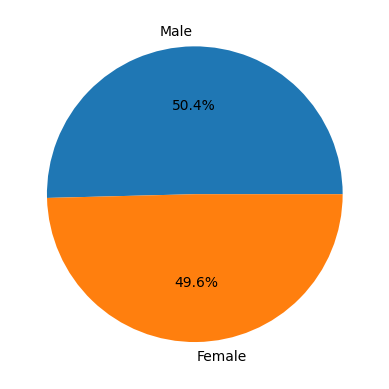

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

plt.pie(
   counts.values,
   labels=counts.index.values,
    autopct="%1.1f%%",
   
)
plt.title,
# Get the unique mice with their gender
counts = mice_df["Sex"].value_counts()
counts
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# clean_study_data_complete.Head()
clean_study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin,Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse (max timepoint)
# Group by mouse ID -> get the max of the Timepoint column
maxtime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max() # Creates a series
# to convert the series to a dataframe, reset the index of the series
maxtime = maxtime.reset_index()
maxtime.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [25]:
# merge to keep data for the max timepoints of each mouse only
merged_data = maxtime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [26]:
# put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create / recreate empty list to fill with tumor vol data(for plotting)
tumor_vol_list = []
for treatment in treatment_list:
    #print (tratment)
    #locate the rows which contains mice on each drug and get the tumor volunmes - use. loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add each series to the empty tumor volume list 
    tumor_vol_list.append(final_tumor_vol)
    # print a list of series
#tumor_vol_list
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


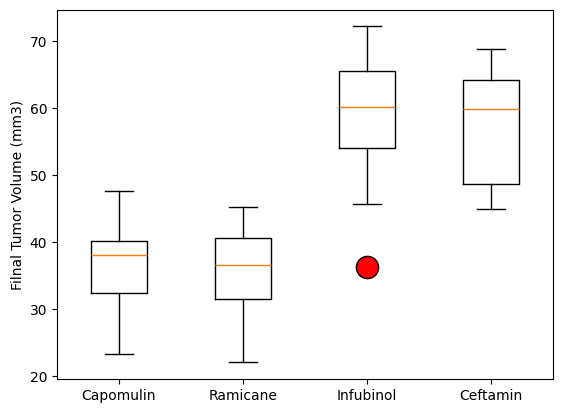

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# customize the outliers 
flierprops = dict(marker ='o', markerfacecolor ='red', markersize=16, markeredgecolor='black')
# customize the median line 
medianprops = dict(linestyle = '-', linewidth =2.5, color='orange')
# Customize the mean 
meanpointprops = dict(marker='D', markeredgecolor = 'black',
                    markerfacecolor ='orange')
plt.boxplot(tumor_vol_list, labels = treatment_list, 
           flierprops=flierprops) 
        
plt.ylabel('Filnal Tumor Volume (mm3)')
plt.show()


                  

## Line and Scatter Plots

In [28]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [30]:
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
l509Data 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


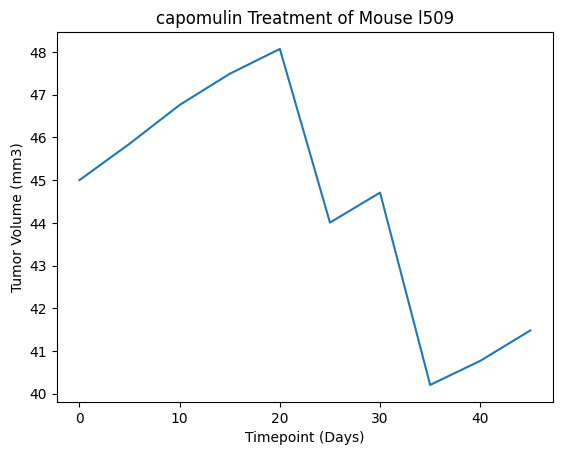

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509Data["Timepoint"],
         l509Data["Tumor Volume (mm3)"])
plt.title ("capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [32]:
# group by the Mouse ID and take the means
# capomulinAveragesDF = capomulinDF.groupby("Mouse ID")["Timepoint"].mean()
capomulinAveragesDF = capomulinDF.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
# only need the weight (g) (x axis) and the Tumor Volume (Y axis)
capomulinAveragesDF.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


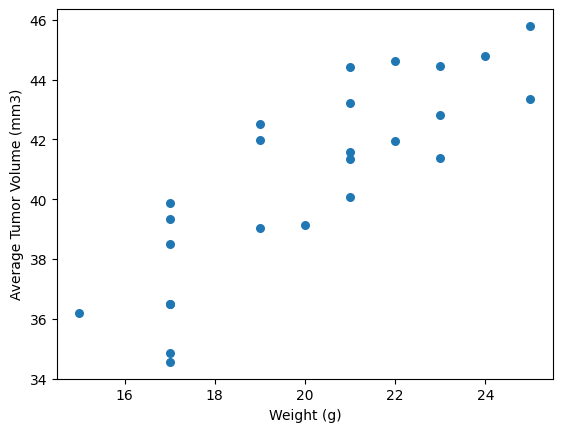

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
   capomulinAveragesDF["Weight (g)"],
   capomulinAveragesDF["Tumor Volume (mm3)"],
    s=50
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)") 
plt.show()

## Correlation and Regression

The correlation between mouse Weight and the average tumor is 0.84


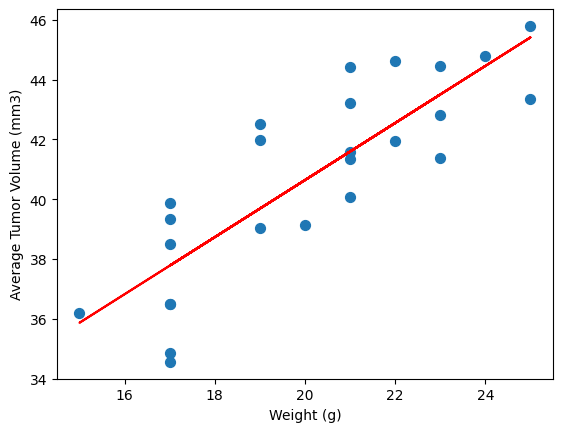

In [34]:

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulinAveragesDF["Weight (g)"], capomulinAveragesDF["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse Weight and the average tumor is {corr:.2f}")

x_values = capomulinAveragesDF ["Weight (g)"]
y_values = capomulinAveragesDF ["Tumor Volume (mm3)"]
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(capomulinAveragesDF ["Weight (g)"], 
                                                         capomulinAveragesDF ["Tumor Volume (mm3)"])
regressValue= x_values * slope + intercept 
# lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(x_values, y_values, s= 50)
plt.plot (x_values, regressValue, "r-")
# plt.annotate (lineEQ, (20,37), fontsize=16, color="red")
plt.xlabel ("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# plt.title ("Average Tumor Volume vs. Mouse Weight for the capomulin Regimen")
plt.show()
